In [ ]:
# Run this every time you open the spreadsheet
%load_ext autoreload
%autoreload 2
from collections import Counter
from importlib.machinery import SourceFileLoader
import numpy as np
from os.path import join
import warnings
warnings.filterwarnings("ignore")
from torchtext.vocab import GloVe
import nltk
nltk.download('punkt')
import seaborn as sns
import matplotlib

from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import *
from nltk.corpus import stopwords
nltk.download('stopwords' ,quiet=True)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import multilabel_confusion_matrix
from sklearn import metrics
import gdown
import string
import numpy
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install Keras-Preprocessing
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
import re
from nltk.corpus import stopwords
from nltk import word_tokenize
STOPWORDS = set(stopwords.words('english'))
from bs4 import BeautifulSoup

from keras.preprocessing.text import Tokenizer
import string


def get_finance_train():
  df_train = pd.read_csv("finance_train.csv")
  return df_train
def get_finance_test():
  df_test = pd.read_csv("finance_test.csv")
  return df_test

PUNCTUATION = '!#$%&()*,-./:;<=>?@^_`{|}~'

REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        return: modified initial string
    """
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing.
    text = text.replace('x', '')
#    text = re.sub(r'\W+', '', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwords from text
    return text

def pad_sequences_train(df_train, df_test):
  tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
  tokenizer.fit_on_texts(df_train['Sentence'].values)
  word_index = tokenizer.word_index
  X = tokenizer.texts_to_sequences(df_train['Sentence'].values)
  X_train = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
  return X_train

def pad_sequences_test(df_train, df_test):
  tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
  tokenizer.fit_on_texts(df_train['Sentence'].values)
  word_index = tokenizer.word_index
  X = tokenizer.texts_to_sequences(df_test['Sentence'].values)
  X_test = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
  return X_test

def run_model(X_train, y_train, X_test, y_test, epochs=5, max_sequence_length=256, max_nb_words=1000, embedding_dim=300):
  if any(x is None for x in [X_train, y_train, X_test, y_test, epochs, max_sequence_length, max_nb_words, embedding_dim]):
    print('Replace the None values above with your new values before calling the run_model() function.')
    return None, None, None
  model = Sequential()
  model.add(Embedding(max_nb_words+1, embedding_dim, mask_zero=True, input_length=max_sequence_length))
  model.add(SpatialDropout1D(0.2))
  model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
  model.add(Dense(n_labels, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  print(model.summary())
  history = model.fit(X_train,
                    y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split=0.1,
                    callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])
  test_loss, test_accuracy = model.evaluate(X_test, y_test)
  return model, history, test_accuracy


EMBEDDING_DIM = 300


nltk.download('wordnet')

print ("Train & Test Files are loaded")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


finance_test.csv.1  100%[===================>]  28.58K  --.-KB/s    in 0s      
finance_train.csv.1 100%[===================>] 252.53K  --.-KB/s    in 0.003s  
Train & Test Files are loaded


In [ ]:
df_train = get_finance_train()
print(df_train.head())

                                            Sentence  Label
0  Autotank Group is part of Aspo 's Systems Divi...      1
1  The contract includes design , construction , ...      1
2  Rapala said it estimates it will make savings ...      2
3  The share capital of Alma Media Corporation (b...      1
4  The financial impact is estimated to be some 1...      2


In [ ]:
print('There are a total of {} examples in the Finance Train dataset.'.format(df_train.shape[0]))

There are a total of 2037 examples in the Finance Train dataset.


In [ ]:
longest_sentence_index = np.argmax([len(x) for x in df_train['Sentence'].str.split(' ')])
longest_sentence = df_train.iloc[longest_sentence_index]['Sentence']
longest_sentence_length = len(longest_sentence.split(' '))
print('The longest sentence has length {} and is: \n\n{}'.format(longest_sentence_length, longest_sentence))

The longest sentence has length 81 and is: 

Supported Nokia phones include : N96 , N95-8GB , N95 , N93-N931 , N92 , N85 , N82 , N81 , N80 , N79 , N78 , N77 , N76 , N75 , N73 , N72 , N71 , E90 , E71 , E70 , E66 , E65 , E62 , E61-E61i , E60 , E51 , E50 , Touch Xpress 5800 , 6220 Classic , 6210 Navigator , 6120 Classic , 6110 Navigator , 5700 , 5500 , 5320XM .


In [ ]:
df_test = get_finance_test()
print(df_test.head())

                                            Sentence  Label
0  In the third quarter of 2010 , net sales incre...      2
1  Foundries division reports its sales increased...      2
2  Financing of the project will come mainly from...      1
3  Sukhraj Dulai , of the 2900 block of Boni Sue ...      1
4  Finland 's leading metals group Outokumpu said...      2


In [ ]:
print('There are a total of {} examples in the Finance Test dataset.'.format(df_test.shape[0]))

There are a total of 227 examples in the Finance Test dataset.


In [ ]:
print(PUNCTUATION)

!#$%&()*,-./:;<=>?@^_`{|}~


In [ ]:
sample_sentence = 'There, is-! a# lo?t of< pu>=nctuat-io!n he~re!'
print(sample_sentence)

There, is-! a# lo?t of< pu>=nctuat-io!n he~re!


In [ ]:
PUNCTUATION_RE = re.compile("[%s]" % PUNCTUATION)

In [ ]:
filtered_sample_sentence = PUNCTUATION_RE.sub("", sample_sentence)
print(filtered_sample_sentence)

There is a lot of punctuation here


In [ ]:
example_sentence = 'No, th-at:/- is not,. how you w.rite a] pr!op$er sen^*tence'
print(example_sentence)
print(clean_text(example_sentence))

No, th-at:/- is not,. how you w.rite a] pr!op$er sen^*tence
write proper sentence


In [ ]:
train_example = df_train.iloc[100]['Sentence']
print(train_example)
print(clean_text(train_example))

Tyrvaan Sanomat , published twice a week by Tyrvaan Sanomat Oy , appears in Sastamala and Kiikoinen .
tyrvaan sanomat published twice week tyrvaan sanomat oy appears sastamala kiikoinen


In [ ]:
df_train['Sentence'] = df_train['Sentence'].apply(clean_text)
df_test['Sentence'] = df_test['Sentence'].apply(clean_text)

In [ ]:
MAX_SEQUENCE_LENGTH = 256

In [ ]:
MAX_NB_WORDS = 1000

In [ ]:
X_train = pad_sequences_train(df_train, df_test)
print('The shape of the dataframe is {}'.format(X_train.shape))
print(X_train[0])

The shape of the dataframe is (2037, 256)
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0 

In [ ]:
X_test = pad_sequences_test(df_train, df_test)
print('The shape of the dataframe is {}'.format(X_test.shape))

The shape of the dataframe is (227, 256)


In [ ]:
y_train = pd.get_dummies(df_train['Label']).values
print(y_train.shape)

(2037, 3)


In [ ]:
y_test = pd.get_dummies(df_test['Label']).values
print(y_test.shape)

(227, 3)


In [ ]:
n_labels = 3
label_map = {0 : "negative",
             1 : "neutral",
             2 : "positive"}

In [ ]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS+1, EMBEDDING_DIM, mask_zero=True, input_length=MAX_SEQUENCE_LENGTH))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(n_labels, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 256, 300)          300300    
                                                                 
 spatial_dropout1d (Spatial  (None, 256, 300)          0         
 Dropout1D)                                                      
                                                                 
 lstm (LSTM)                 (None, 100)               160400    
                                                                 
 dense (Dense)               (None, 3)                 303       
                                                                 
Total params: 461003 (1.76 MB)
Trainable params: 461003 (1.76 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
epochs = 5
batch_size = 64

In [ ]:
history = model.fit(X_train,
                    y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split=0.1,
                    callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/5
29/29 [==============================] - 64s 2s/step - loss: 0.9404 - accuracy: 0.6678 - val_loss: 0.6829 - val_accuracy: 0.8039
Epoch 2/5
29/29 [==============================] - 49s 2s/step - loss: 0.5703 - accuracy: 0.7736 - val_loss: 0.5587 - val_accuracy: 0.8088
Epoch 3/5
29/29 [==============================] - 45s 2s/step - loss: 0.3803 - accuracy: 0.8598 - val_loss: 0.5044 - val_accuracy: 0.8431
Epoch 4/5
29/29 [==============================] - 43s 1s/step - loss: 0.2356 - accuracy: 0.9193 - val_loss: 0.4579 - val_accuracy: 0.8578
Epoch 5/5
29/29 [==============================] - 43s 1s/step - loss: 0.1572 - accuracy: 0.9509 - val_loss: 0.5233 - val_accuracy: 0.8137


In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print('Test set loss is {:} and accuracy is {:.2%}'.format(0.5338, 0.8414))

8/8 [==============================] - 1s 115ms/step - loss: 0.5440 - accuracy: 0.8238
Test set loss is 0.5338 and accuracy is 84.14%


In [ ]:
training_loss = history.history['loss']

In [ ]:
validation_loss = history.history['val_loss']

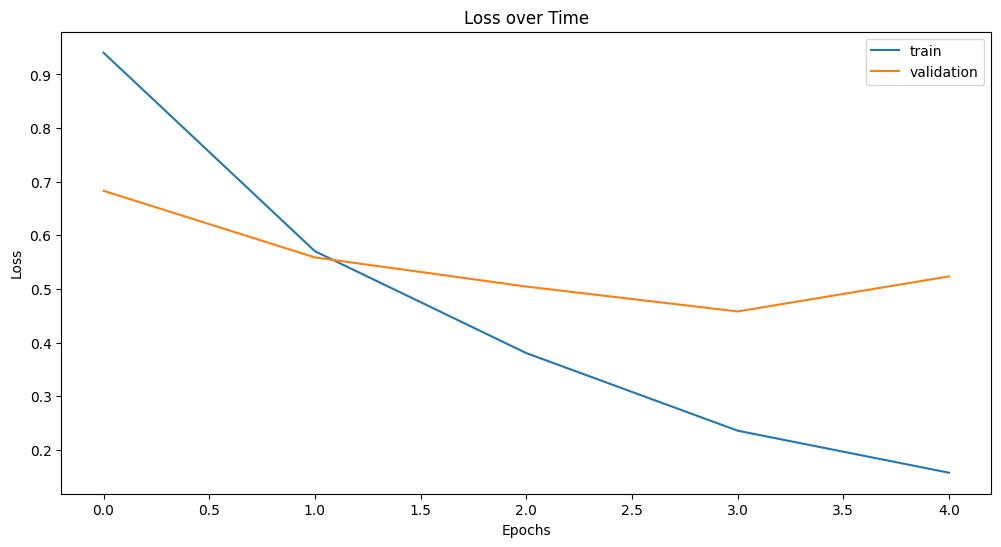

In [ ]:
fig = plt.figure(figsize=(12,6))
plt.title('Loss over Time')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.plot(training_loss, label='train')
plt.plot(validation_loss, label='validation')

plt.legend()
plt.show()

In [ ]:
training_accuracy = None ### YOUR CODE HERE
validation_accuracy = None ### YOUR CODE HERE

In [ ]:
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

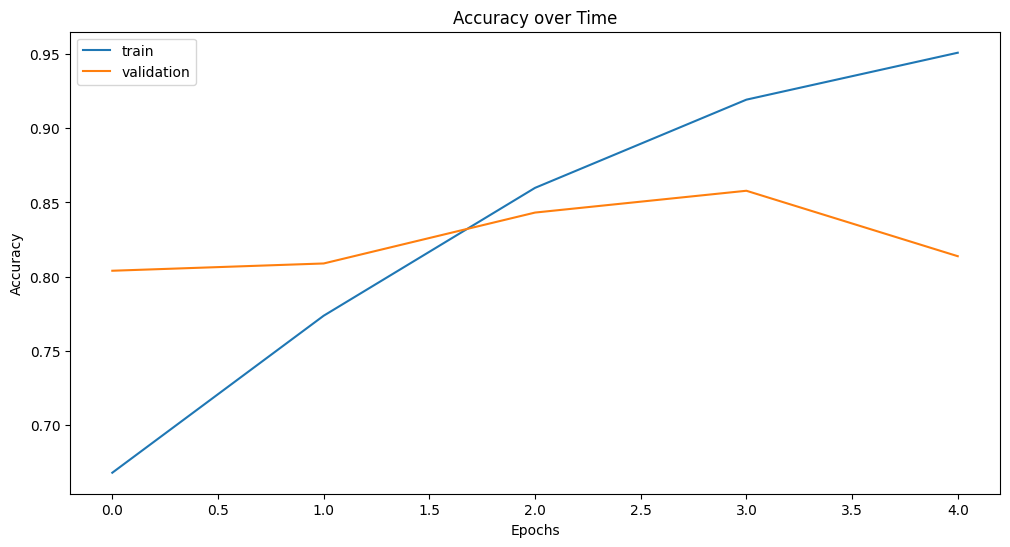

In [ ]:
fig = plt.figure(figsize=(12,6))
plt.title('Accuracy over Time')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.plot(training_accuracy, label='train')
plt.plot(validation_accuracy, label='validation')

plt.legend()
plt.show()

In [ ]:
model, history, test_acc = run_model(
    X_train=None, ### YOUR CODE HERE
    y_train=None, ### YOUR CODE HERE
    X_test=None, ### YOUR CODE HERE
    y_test=None, ### YOUR CODE HERE
    epochs=None, ### YOUR CODE HERE
    max_sequence_length=None, ### YOUR CODE HERE
    max_nb_words=None, ### YOUR CODE HERE
    embedding_dim=None ### YOUR CODE HERE
)

Replace the None values above with your new values before calling the run_model() function.


In [ ]:
model, history, test_acc = run_model(
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    epochs=6,
    max_sequence_length=256,
    max_nb_words=1500,
    embedding_dim=280
)
print('New test accuracy is {}'.format(test_acc))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 256, 280)          420280    
                                                                 
 spatial_dropout1d_1 (Spati  (None, 256, 280)          0         
 alDropout1D)                                                    
                                                                 
 lstm_1 (LSTM)               (None, 100)               152400    
                                                                 
 dense_1 (Dense)             (None, 3)                 303       
                                                                 
Total params: 572983 (2.19 MB)
Trainable params: 572983 (2.19 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/6
29/29 [==============================] - 45s 1s/step - loss: 0.9485 -